## EDA for Credit-Scoring dataset

#### 1. Import of libraries and Data Source:


>>_view first 5 rows of dataset_

In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   


df = pd.read_csv("../data/raw/loans.csv")
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
   customer.id credit.policy             purpose  int.rate  installment  \
0        10001             1  debt_consolidation    0.1189       829.10   
1        10002             1         credit_card    0.1071       228.22   
2        10003             1  debt_consolidation    0.1357       366.86   
3        10004             1  debt_consolidation    0.1008       162.34   
4        10005             1         credit_card    0.1426       102.92   

   log.annual.inc    dti  fico  days.with.cr.line  revol.bal revol.util  \
0       11.350407  19.48   737        5639.958333    28854.0       52.1   
1       11.082143  14.29   707        2760.000000    33623.0       76.7   
2       10.373491  11.63   682        4710.000000     3511.0       25.6   
3       11.350407    8.1   712        2699.958333    33667.0       73.2   
4       11.299732  14.97   667        4066.000000     4740.0       39.5   

   inq.last.6mths delinq.2yrs pub.rec  not.fully.paid  
0            

#### 2. Dataset information check:

In [186]:
# Check int.rate column info
print(df.info())
print(df['dti'].info())
print(f"Data type: {df['dti'].dtype}")
print(f"Missing values: {df['dti'].isna().sum()}")
print(f"Number of unique values: {df['dti'].nunique()}")
print(f"First 10 values:\n{df['dti'].head(10)}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer.id        9578 non-null   int64  
 1   credit.policy      9578 non-null   object 
 2   purpose            9578 non-null   object 
 3   int.rate           9578 non-null   float64
 4   installment        9578 non-null   float64
 5   log.annual.inc     9573 non-null   float64
 6   dti                9578 non-null   object 
 7   fico               9578 non-null   int64  
 8   days.with.cr.line  9549 non-null   float64
 9   revol.bal          9577 non-null   float64
 10  revol.util         9516 non-null   object 
 11  inq.last.6mths     9548 non-null   float64
 12  delinq.2yrs        9549 non-null   object 
 13  pub.rec            9549 non-null   object 
 14  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(3), object(6)
memory usage: 1.1+ MB
None
<class 'pa

#### 3. Dataset main parameters check:

In [187]:
print(df.describe(include='all'))

         customer.id credit.policy             purpose     int.rate  \
count    9578.000000          9578                9578  9578.000000   
unique           NaN             4                   7          NaN   
top              NaN             1  debt_consolidation          NaN   
freq             NaN          7709                3957          NaN   
mean    14789.500000           NaN                 NaN     0.125529   
std      2765.074773           NaN                 NaN     0.202225   
min     10001.000000           NaN                 NaN     0.060000   
25%     12395.250000           NaN                 NaN     0.103900   
50%     14789.500000           NaN                 NaN     0.122100   
75%     17183.750000           NaN                 NaN     0.140700   
max     19578.000000           NaN                 NaN    14.700000   

        installment  log.annual.inc   dti         fico  days.with.cr.line  \
count   9578.000000     9573.000000  9578  9578.000000        9549.000

In [188]:
print(df['purpose'].unique())

['debt_consolidation' 'credit_card' 'all_other' 'home_improvement'
 'small_business' 'major_purchase' 'educational']


#### 4. Data exploration with histograms:

>>>> 4.1. SeriousDlqin2yrs is the target variable. Here is the histogram and percentage of positive values (1)

not.fully.paid positive percentage is  16
 16


C:\Users\elena\AppData\Local\Temp\ipykernel_24392\1456624207.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot (x='not.fully.paid',data=df,palette='RdBu_r')


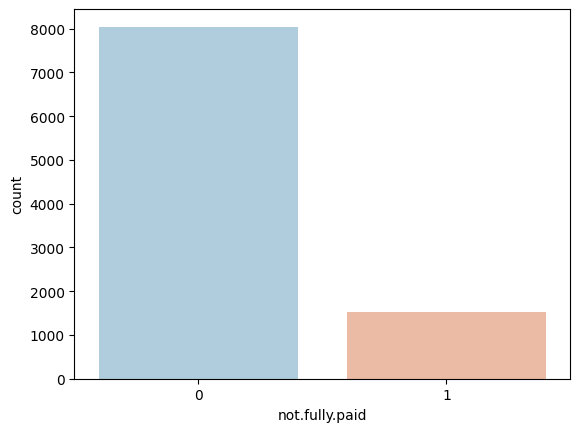

In [189]:
sns.countplot (x='not.fully.paid',data=df,palette='RdBu_r')
print('not.fully.paid positive percentage is ', round(len(df[df['not.fully.paid']==1])*100/len(df)))

<Axes: xlabel='credit.policy', ylabel='count'>

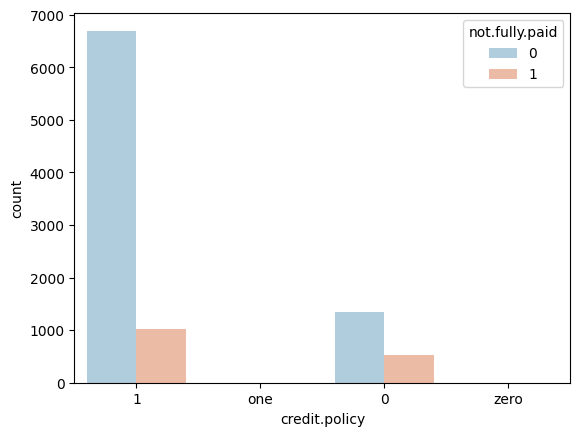

In [190]:
sns.countplot (x='credit.policy',data=df,palette='RdBu_r', hue='not.fully.paid')
#sns.histplot(data=df, x='DebtRatio', bins=50, kde=True, color='blue', log_scale=True)

<Axes: xlabel='credit.policy', ylabel='count'>

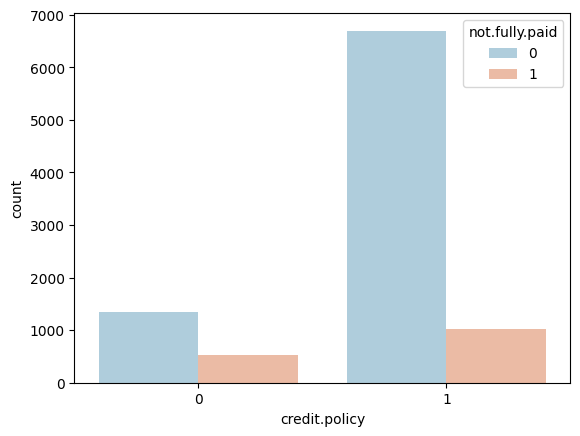

In [191]:
df['credit.policy'] = df['credit.policy'].map({'one': 1, 'zero': 0, '1': 1, '0': 0})
sns.countplot(x='credit.policy', data=df, palette='RdBu_r', hue='not.fully.paid')

C:\Users\elena\AppData\Local\Temp\ipykernel_24392\1008080330.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='not.fully.paid',y='purpose',data=df,hue='credit.policy',palette='RdBu_r',ci=None)


<Axes: xlabel='not.fully.paid', ylabel='purpose'>

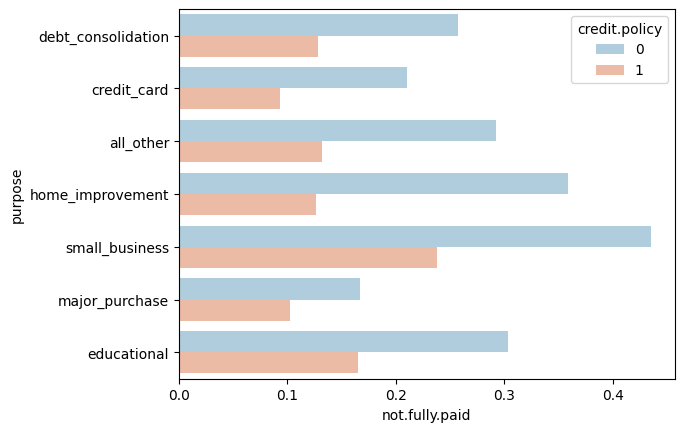

In [192]:
#sns.boxplot(x='not.fully.paid', y='purpose', data=df, palette='RdBu_r')
#sns.boxplot(x="purpose", y="not.fully.paid", data=df, palette="coolwarm")
sns.barplot(x='not.fully.paid',y='purpose',data=df,hue='credit.policy',palette='RdBu_r',ci=None)

<Axes: xlabel='int.rate', ylabel='Count'>

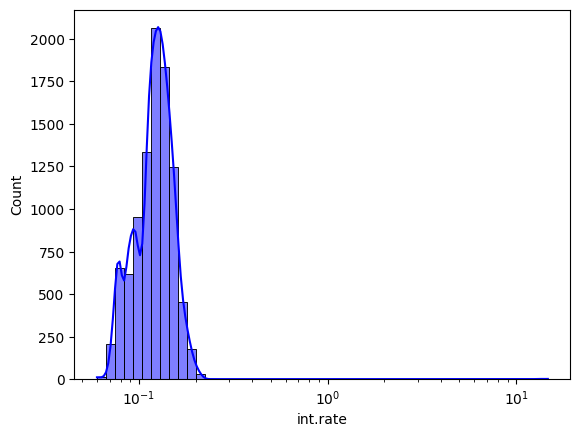

In [193]:
sns.histplot(data=df, x='int.rate', bins=50, kde=True, color='blue', log_scale=True)

<Axes: xlabel='installment', ylabel='Count'>

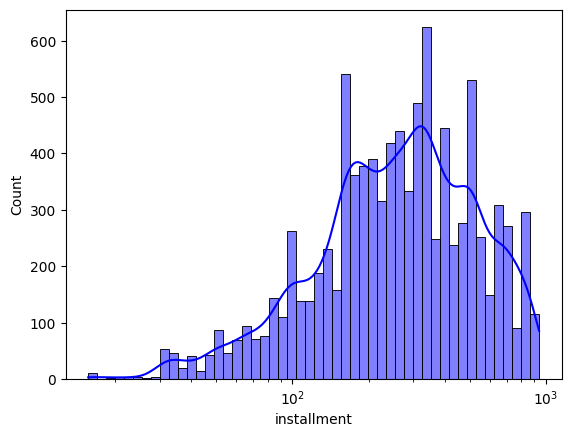

In [194]:
sns.histplot(data=df, x='installment', bins=50, kde=True, color='blue', log_scale=True)

<Axes: xlabel='log.annual.inc', ylabel='Count'>

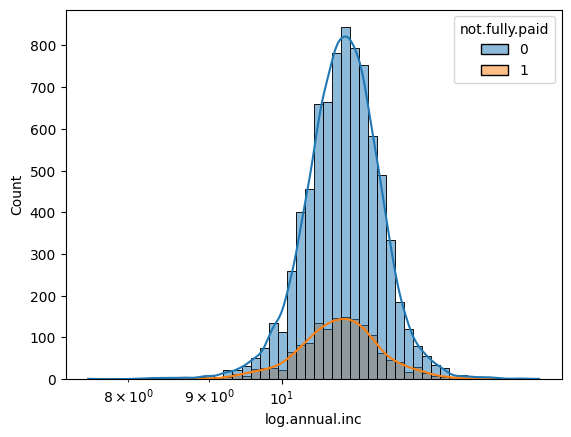

In [206]:
sns.histplot(data=df, x='log.annual.inc', bins=50, kde=True, color='blue', log_scale=True,hue='not.fully.paid')

In [207]:
# Print all non-numeric values in dti column
non_numeric_dti = df[pd.to_numeric(df['dti'], errors='coerce').isna()]
print(f"Non-numeric values count: {len(non_numeric_dti)}")
print("\nNon-numeric values:")
print(non_numeric_dti['dti'].unique())
print("\nFirst 20 rows with non-numeric dti:")
print(non_numeric_dti['dti'].head(20).tolist())

Non-numeric values count: 0

Non-numeric values:
[]

First 20 rows with non-numeric dti:
[]


In [208]:
# Replace 'six' with '6.0' in dti column
df['dti'] = df['dti'].replace('six', '6.0')

# Convert column to numeric (handles any remaining string issues)
df['dti'] = pd.to_numeric(df['dti'], errors='coerce')

print(f"Data type after conversion: {df['dti'].dtype}")
print(f"Missing values (from conversion): {df['dti'].isna().sum()}")
print(f"\nFirst 20 values:\n{df['dti'].head(20)}")

Data type after conversion: float64
Missing values (from conversion): 0

First 20 values:
0     19.48
1     14.29
2     11.63
3      8.10
4     14.97
5     16.98
6      4.00
7     11.08
8     17.25
9     10.00
10    22.09
11     9.16
12    15.49
13     6.50
14     9.73
15    13.04
16     2.26
17     7.07
18     3.80
19     2.74
Name: dti, dtype: float64


<Axes: xlabel='dti', ylabel='Count'>

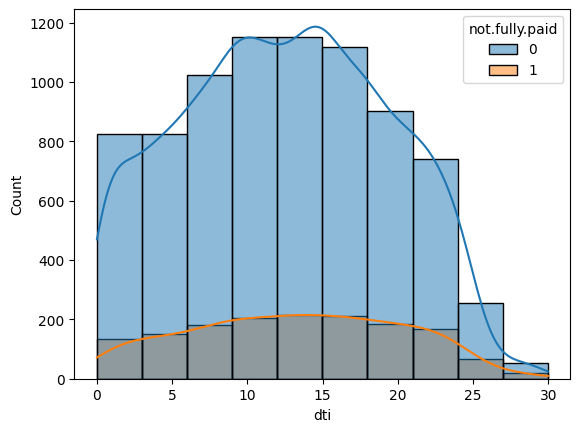

In [209]:
sns.histplot(data=df, x='dti', bins=10, kde=True, color='blue',hue='not.fully.paid')

<Axes: xlabel='fico', ylabel='Count'>

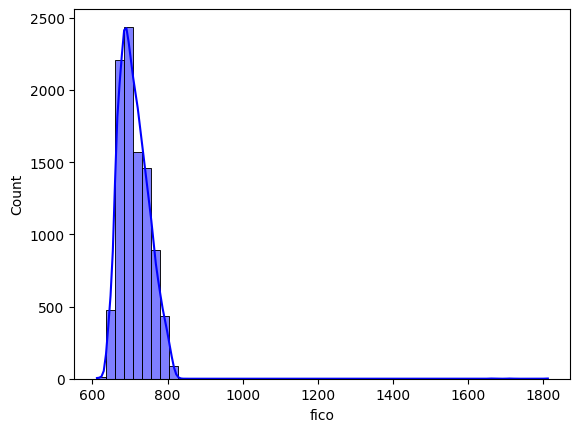

In [210]:
sns.histplot(data=df, x='fico', bins=50, kde=True, color='blue')

<Axes: xlabel='days.with.cr.line', ylabel='Count'>

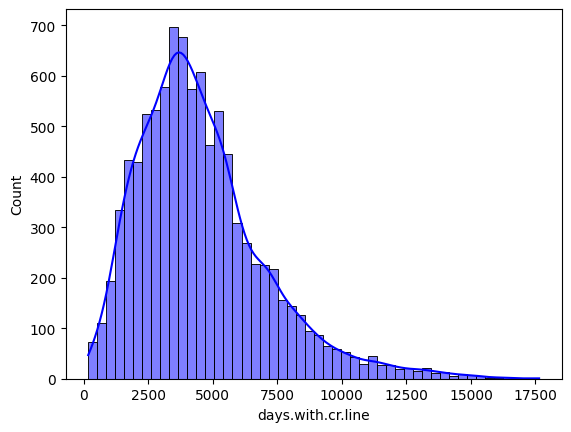

In [211]:
sns.histplot(data=df, x='days.with.cr.line', bins=50, kde=True, color='blue')

c:\Users\elena\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


<Axes: xlabel='revol.bal', ylabel='Count'>

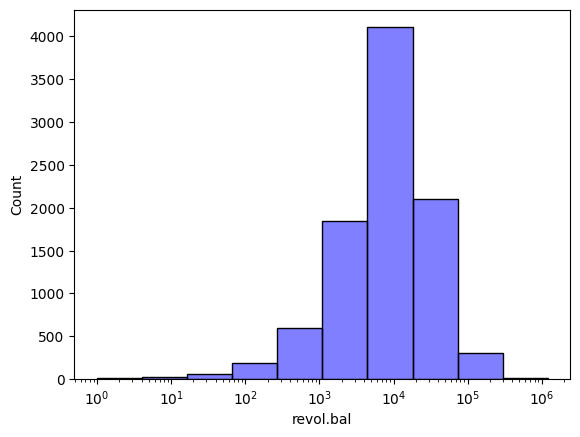

In [212]:
sns.histplot(data=df, x='revol.bal', bins=10, kde=True, color='blue', log_scale=True)

Data type: float64
Missing values: 63

First 10 values:
0    52.1
1    76.7
2    25.6
3    73.2
4    39.5
5    51.0
6    76.8
7    68.6
8    51.1
9    23.0
Name: revol.util, dtype: float64


<Axes: xlabel='revol.util', ylabel='Count'>

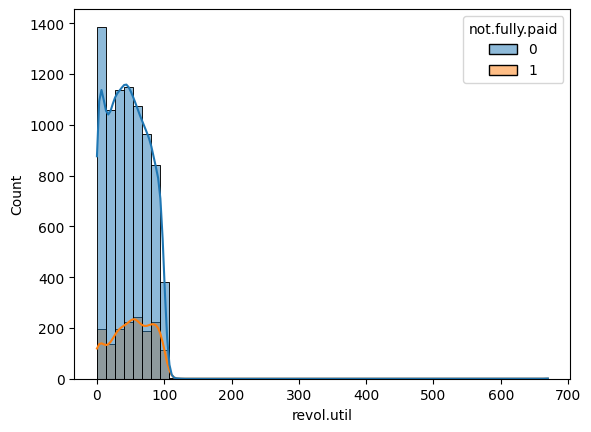

In [213]:
# Convert revol.util to numeric
df['revol.util'] = pd.to_numeric(df['revol.util'], errors='coerce')

print(f"Data type: {df['revol.util'].dtype}")
print(f"Missing values: {df['revol.util'].isna().sum()}")
print(f"\nFirst 10 values:\n{df['revol.util'].head(10)}")

sns.histplot(data=df, x='revol.util', bins=50, kde=True, color='blue', hue='not.fully.paid')

<Axes: xlabel='inq.last.6mths', ylabel='Count'>

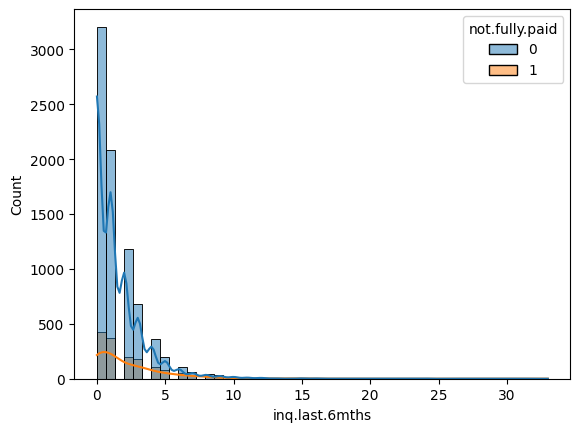

In [214]:
sns.histplot(data=df, x='inq.last.6mths', bins=50, kde=True, color='blue', hue='not.fully.paid')

<Axes: xlabel='delinq.2yrs', ylabel='count'>

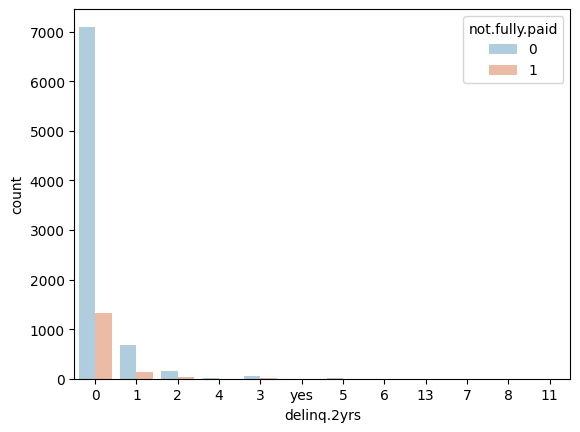

In [215]:
sns.countplot (x='delinq.2yrs',data=df,palette='RdBu_r', hue='not.fully.paid')

<Axes: xlabel='pub.rec', ylabel='count'>

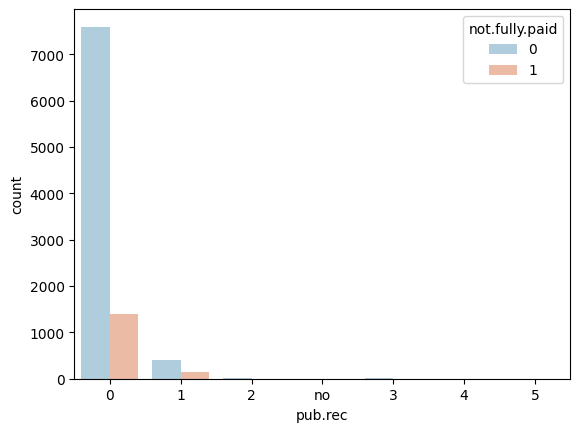

In [216]:
sns.countplot (x='pub.rec',data=df,palette='RdBu_r', hue='not.fully.paid')